# 1

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import necessary libraries and download NLTK resources

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load your text document

In [19]:
document = """This is a sample sentence, showing off the stop words filtration."""

# Tokenization - Split the text into words

In [20]:
words = word_tokenize(document)
print(words)

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']


# Stop Word Removal - Remove common stop words

In [21]:
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]
print(filtered_words)

['sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


# Stemming - Reduce words to their root form

In [22]:
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]
print(stemmed_words)

['sampl', 'sentenc', ',', 'show', 'stop', 'word', 'filtrat', '.']


# Reconstruct the preprocessed text

In [23]:
preprocessed_text = ' '.join(stemmed_words)
print("Original Text:",document)
print("\nPreprocessed Text:",preprocessed_text)


Original Text: This is a sample sentence, showing off the stop words filtration.

Preprocessed Text: sampl sentenc , show stop word filtrat .


# 2

# Define a Set of Documents

In [24]:
documents = {
    1: "The quick brown fox jumped over the lazy dog .",
    2: "The lazy dog slept in the sun.",
}

# Tokenize the Documents

In [25]:
import re

def tokenize(text):
    words = re.findall(r'\w+', text.lower())
    return set(words)


tokenized_documents = {doc_id: tokenize(text) for doc_id, text in documents.items()}
tokenized_documents


{1: {'brown', 'dog', 'fox', 'jumped', 'lazy', 'over', 'quick', 'the'},
 2: {'dog', 'in', 'lazy', 'slept', 'sun', 'the'}}

# Build the Inverted Index

In [26]:
inverted_index = {}

for doc_id, words in tokenized_documents.items():
    for word in words:
        if word not in inverted_index:
            inverted_index[word] = [doc_id]
        else:
            inverted_index[word].append(doc_id)

inverted_index


{'jumped': [1],
 'dog': [1, 2],
 'the': [1, 2],
 'fox': [1],
 'over': [1],
 'lazy': [1, 2],
 'quick': [1],
 'brown': [1],
 'in': [2],
 'sun': [2],
 'slept': [2]}

# Implement a Document Retrieval Function

In [27]:
def retrieve_documents(query):
    query_words = tokenize(query)
    matching_doc_ids = set()

    for word in query_words:
        if word in inverted_index:
            matching_doc_ids.update(inverted_index[word])

    if matching_doc_ids:
        matching_documents = {doc_id: documents[doc_id] for doc_id in matching_doc_ids}
        return matching_documents
    else:
        return None


query = "Sun is very bright Today"
retrieved_docs = retrieve_documents(query)

if retrieved_docs:
    for doc_id, doc_text in retrieved_docs.items():
        print(f"Document {doc_id}: {doc_text}")
else:
    print("No matching documents found.")


Document 2: The lazy dog slept in the sun.


# 3.


In [28]:
!pip install pgmpy

In [29]:
import numpy as np
import pandas as pd
import csv
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination

In [30]:
heartDisease = pd.read_csv(r"/content/drive/MyDrive/prac/heart.csv")


In [31]:
heartDisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [32]:
heartDisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [33]:
model= BayesianModel([('age','target'),('sex','target'),('exang','target'),('cp','target'),('target','restecg'),('target','chol')])
print('\nLearning CPD using Maximum likelihood estimators')
model.fit(heartDisease,estimator=MaximumLikelihoodEstimator)


Learning CPD using Maximum likelihood estimators


In [34]:
print('\n Inferencing with Bayesian Network:')
HeartDiseasetest_infer = VariableElimination(model)
print('\n 1. Probability of HeartDisease given evidence= restecg')
q1=HeartDiseasetest_infer.query(variables=['target'],evidence={'restecg':0,'sex':1})
print(q1)


 Inferencing with Bayesian Network:

 1. Probability of HeartDisease given evidence= restecg
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.6453 |
+-----------+---------------+
| target(1) |        0.3547 |
+-----------+---------------+


In [35]:
print('\n 2. Probability of HeartDisease given evidence= cp ')
q2=HeartDiseasetest_infer.query(variables=['target'],evidence={'sex':1})
print(q2)


 2. Probability of HeartDisease given evidence= cp 
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5661 |
+-----------+---------------+
| target(1) |        0.4339 |
+-----------+---------------+


# 4.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [37]:
X = pd.read_csv(r"/content/drive/MyDrive/prac/CC_GENERAL.csv")
X.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [38]:
# Dropping the CUST_ID column from the data
X = X.drop('CUST_ID', axis = 1)

# Handling the missing values
X.fillna(method ='ffill', inplace = True)

In [39]:
# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that the data approximately
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [40]:
# Reducing dimension using PCA
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

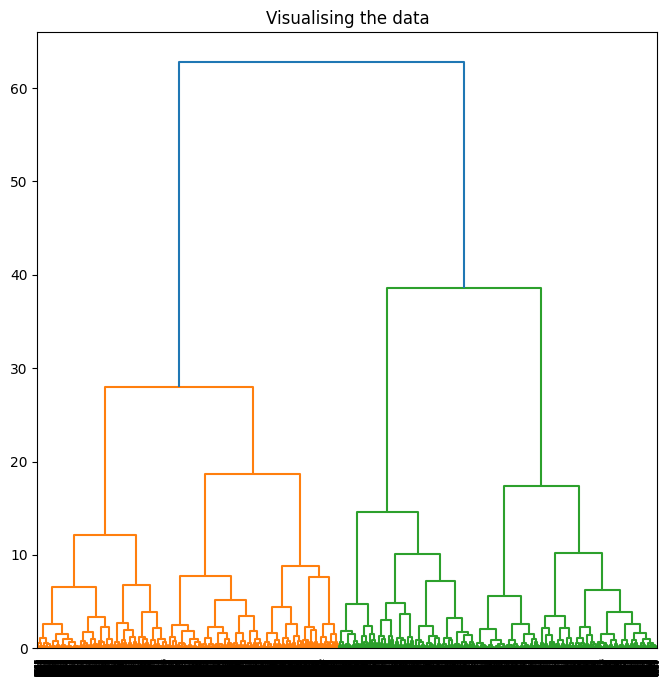

In [41]:
# Dendogram
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

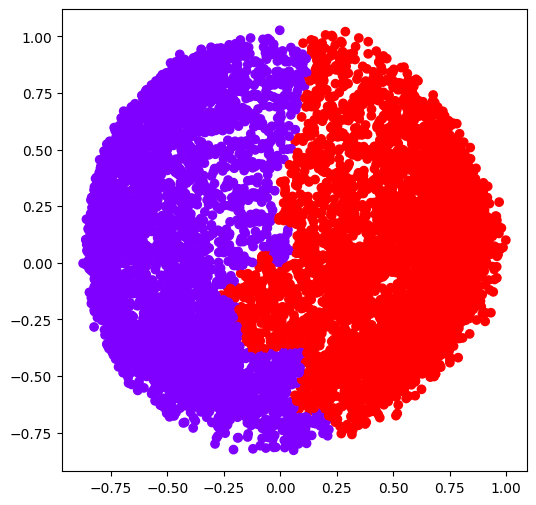

In [42]:
# Building and visualizing the different clustering models for different values of k
# for k = 2
ac2 = AgglomerativeClustering(n_clusters = 2)

# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

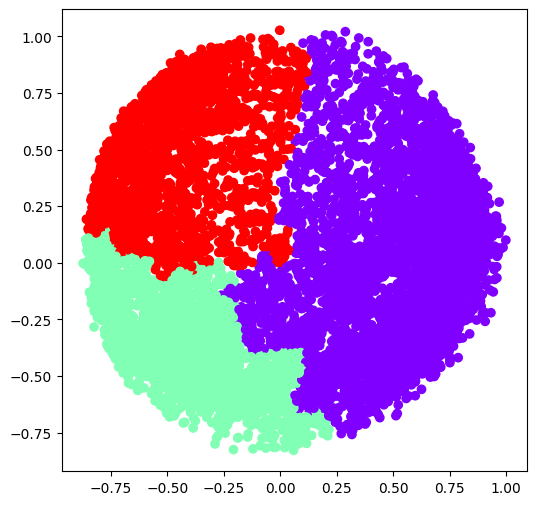

In [43]:
# for k = 3
ac3 = AgglomerativeClustering(n_clusters = 3)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

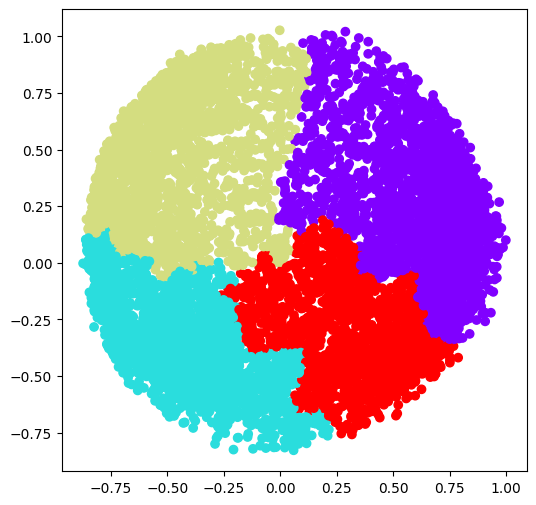

In [44]:
# for k = 4
ac4 = AgglomerativeClustering(n_clusters = 4)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

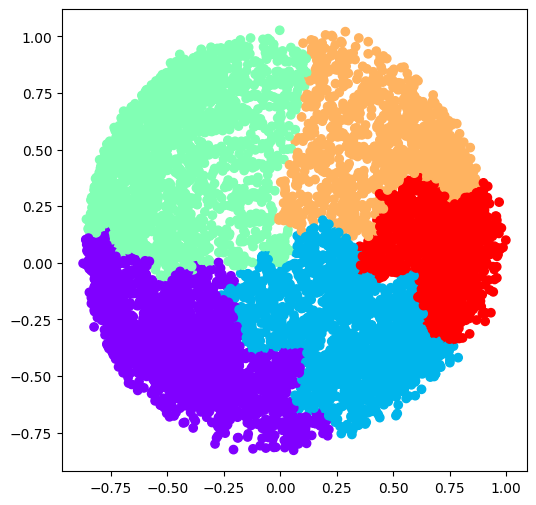

In [45]:
# for k = 5
ac5 = AgglomerativeClustering(n_clusters = 5)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

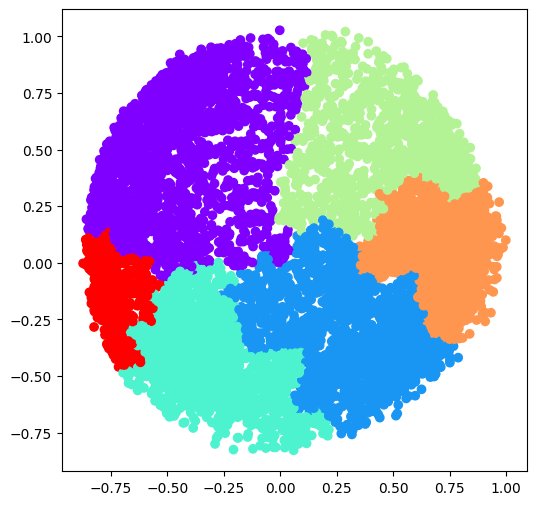

In [46]:
# for k = 6
ac6 = AgglomerativeClustering(n_clusters = 6)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

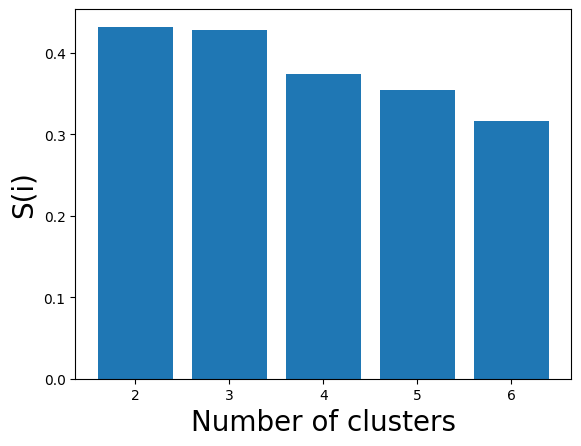

In [47]:
# Evaluating the different models and Visualizing the results

k = [2, 3, 4, 5, 6]

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac6.fit_predict(X_principal)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

# 5.

In [48]:
from networkx import NetworkXError
def pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1.0e-6, nstart=None, weight='weight', dangling=None):
    if len(G) == 0:
        return {}

    if not G.is_directed():
        D = G.to_directed()
    else:
        D = G

    # Create a copy in (right) stochastic form
    W = nx.stochastic_graph(D, weight=weight)
    N = W.number_of_nodes()

    # Choose fixed starting vector if not given
    if nstart is None:
        x = dict.fromkeys(W, 1.0 / N)
    else:
        # Normalized nstart vector
        s = float(sum(nstart.values()))
        x = dict((k, v / s) for k, v in nstart.items())

    if personalization is None:
        # Assign uniform personalization vector if not given
        p = dict.fromkeys(W, 1.0 / N)
    else:
        missing = set(G) - set(personalization)
        if missing:
            raise NetworkXError('Personalization dictionary must have a value for every node. Missing nodes %s' % missing)
        s = float(sum(personalization.values()))
        p = dict((k, v / s) for k, v in personalization.items())

    if dangling is None:
        # Use personalization vector if dangling vector not specified
        dangling_weights = p
    else:
        missing = set(G) - set(dangling)
        if missing:
            raise NetworkXError('Dangling node dictionary must have a value for every node. Missing nodes %s' % missing)
        s = float(sum(dangling.values()))
        dangling_weights = dict((k, v/s) for k, v in dangling.items())

    dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0]

     # power iteration: make up to max_iter iterations
    for _ in range(max_iter):
        xlast = x
        x = dict.fromkeys(xlast.keys(), 0)
        danglesum = alpha * sum(xlast[n] for n in dangling_nodes)
        for n in x:
            # this matrix multiply looks odd because it is
            # doing a left multiply x^T=xlast^T*W
            for nbr in W[n]:
                x[nbr] += alpha * xlast[n] * W[n][nbr][weight]
            x[n] += danglesum * dangling_weights[n] + (1.0 - alpha) * p[n]

        # check convergence, l1 norm
        err = sum([abs(x[n] - xlast[n]) for n in x])
        if err < N*tol:
            return x
    raise NetworkXError('Pagerank: power iteration failed to converge in %d iterations.' % max_iter)


In [49]:
import networkx as nx
G = nx.barabasi_albert_graph(60, 41)
pr = nx.pagerank(G, 0.4)
print(pr)

{0: 0.027862363162289558, 1: 0.013379421900520733, 2: 0.01377780166618928, 3: 0.012758580913689727, 4: 0.012772104612563033, 5: 0.013574765456587097, 6: 0.01276536520380055, 7: 0.012359498013033238, 8: 0.012966799224248218, 9: 0.012157591233225289, 10: 0.013372392586281383, 11: 0.012172453052973108, 12: 0.013185516194877227, 13: 0.013568453925836554, 14: 0.013169286045206322, 15: 0.012762251613640613, 16: 0.013182913163636078, 17: 0.013369083454058505, 18: 0.012553544570568224, 19: 0.01258291480724449, 20: 0.012964454740981316, 21: 0.01236891012682467, 22: 0.013363059663813522, 23: 0.012758077500216751, 24: 0.012365642247701113, 25: 0.012765821314177084, 26: 0.013571291035428607, 27: 0.013376359125667668, 28: 0.012754157051484949, 29: 0.013161677689735647, 30: 0.013162794058473285, 31: 0.012756697282967145, 32: 0.013155216991347793, 33: 0.012573461491665206, 34: 0.012770926480375998, 35: 0.01356704166965374, 36: 0.012373016540394886, 37: 0.013577536060849044, 38: 0.012963111276358873, 

In [58]:
import networkx as nx

def pagerank_undirected(G):
  """Returns a dictionary of PageRank values for each node in the undirected graph G."""
  D = G.to_directed()
  return nx.pagerank(D)

G = nx.barabasi_albert_graph(60, 41)

# Calculate the PageRank of the undirected graph
pr = pagerank_undirected(G)

# Print the PageRank values
print(pr)


{0: 0.0360260694557933, 1: 0.010302518732809393, 2: 0.009783825766260142, 3: 0.01134203751704854, 4: 0.01081482510234709, 5: 0.00874069729498821, 6: 0.010827702825384868, 7: 0.010818779092385182, 8: 0.008728388779677684, 9: 0.011336804271099541, 10: 0.009259659170892455, 11: 0.010827903230535459, 12: 0.010294950376119718, 13: 0.01029176073467123, 14: 0.01133722765247016, 15: 0.010302144927512896, 16: 0.009275619055446556, 17: 0.00978746750282337, 18: 0.011866596248368649, 19: 0.011865280859630744, 20: 0.009785818365853738, 21: 0.009777153391801366, 22: 0.010823501853672233, 23: 0.009256019169151808, 24: 0.011345442846022152, 25: 0.010302518732809393, 26: 0.009249596502787151, 27: 0.01029699140540996, 28: 0.010299077954621634, 29: 0.01030896363819572, 30: 0.006155407174353552, 31: 0.008231446448257448, 32: 0.00873154090471671, 33: 0.01133722765247016, 34: 0.010306209219860082, 35: 0.011340969109985178, 36: 0.009278377950896378, 37: 0.010303276848331207, 38: 0.011868505447891144, 39: 0.0

# 6.

In [50]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
def web(page,WebUrl):
    if(page>0):
        url = WebUrl
        code = requests.get(url)
        plain = code.text
        soup = BeautifulSoup(plain, 'html.parser')
        product_name = []
        prices = []
        for link in soup.findAll('h3', {'class':'w-full'}):
            name = link.get_text(',')
            product_name.append(name)
        for link in soup.findAll('span', {'class':['whitespace-nowrap text-base font-bold override:opacity-100',
                                                   'whitespace-nowrap text-base text-puma-red font-bold']}):
            price = link.get_text(' ')
            prices.append(price)
    return product_name,prices

name,prices=web(1,'https://in.puma.com/in/en/collections/collections-football/collections-football-manchester-city-fc')

df = pd.DataFrame({'Product Name':name,'Price':prices})
df.to_csv('products.csv', index=False, encoding='utf-8')
df

,Product Name,Price
0,Manchester City F.C. Home Men's Replica Jersey...,"₹3,299"
1,Manchester City F.C. Men's Football Training P...,"₹3,749"
2,"Manchester City F.C. Men's Replica Shorts,Inte...","₹1,589"
3,"Manchester City F.C. Men's Replica Shorts,Puma...","₹1,799"
4,"Manchester City F.C. Men's Replica Shorts,Puma...","₹1,799"
5,Manchester City F.C. Men's Football Training J...,"₹2,969"
6,Manchester City F.C. Men's Football Training J...,"₹2,619"
7,Manchester City F.C. Away 22/23 Authentic Men'...,"₹7,499"
8,Manchester City F.C. Football Quarter-zip Men'...,"₹4,249"
9,"Manchester City F.C. Men's Replica Shorts,Fizz...","₹2,099"


In [51]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
def web(page,WebUrl):
    if(page>0):
        url = WebUrl
        code = requests.get(url)
        plain = code.text
        soup = BeautifulSoup(plain, 'html.parser')
        product_name = []
        prices = []
        for link in soup.findAll('h3', {'class':'w-full'}):
            name = link.get_text(',')
            product_name.append(name)
        for link in soup.findAll('span', {'class':['whitespace-nowrap text-base font-bold override:opacity-100',
                                                   'whitespace-nowrap text-base text-puma-red font-bold']}):
            price = link.get_text(' ')
            prices.append(price)
    return product_name,prices

name,prices=web(1,'https://in.puma.com/in/en/collections/collections-football/collections-football-manchester-city-fc')

df = pd.DataFrame({'Product Name':name,'Price':prices})
df.to_csv('products.csv', index=False, encoding='utf-8')
df

,Product Name,Price
0,Manchester City F.C. Home Men's Replica Jersey...,"₹3,299"
1,Manchester City F.C. Men's Football Training P...,"₹3,749"
2,"Manchester City F.C. Men's Replica Shorts,Inte...","₹1,589"
3,"Manchester City F.C. Men's Replica Shorts,Puma...","₹1,799"
4,"Manchester City F.C. Men's Replica Shorts,Puma...","₹1,799"
5,Manchester City F.C. Men's Football Training J...,"₹2,969"
6,Manchester City F.C. Men's Football Training J...,"₹2,619"
7,Manchester City F.C. Away 22/23 Authentic Men'...,"₹7,499"
8,Manchester City F.C. Football Quarter-zip Men'...,"₹4,249"
9,"Manchester City F.C. Men's Replica Shorts,Fizz...","₹2,099"
